In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# add Matplotlib
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [132]:
Measurement

sqlalchemy.ext.automap.measurement

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
# 3. Convert the June temperatures to a list.
results_jun = []
results_jun = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == '06').all()

print(results_jun)



[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

### Combined Step #2 and Step #3 in above cell

In [42]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
jun_df = pd.DataFrame(results_jun, columns=['date','tobs']).rename(columns={'tobs':'June Temps'})
jun_df.set_index(jun_df['date'], inplace = True)
jun_df.drop('date', axis=1, inplace=True)

jun_df

,June Temps
date,
2010-06-01,78.0
2010-06-02,76.0
2010-06-03,78.0
2010-06-04,76.0
2010-06-05,77.0
...,...
2017-06-26,79.0
2017-06-27,74.0
2017-06-28,74.0


In [43]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
jun_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [44]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results_dec = []
results_dec = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == '12').all()

print(results_dec)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [9]:
# 7. Convert the December temperatures to a list.
# Combined Step 6 and Step 7 in cell above

In [45]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(results_dec, columns=['date','tobs']).rename(columns={'tobs':'December Temps'})
dec_df.set_index(dec_df['date'], inplace = True)
dec_df.drop('date', axis=1, inplace=True)

dec_df

,December Temps
date,
2010-12-01,76.0
2010-12-03,74.0
2010-12-04,74.0
2010-12-06,64.0
2010-12-07,64.0
...,...
2016-12-27,71.0
2016-12-28,71.0
2016-12-29,69.0


In [46]:
# 9. Calculate and print out the summary statistics for the December temperature DataFrame.
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


### Add histograms for June and December temps

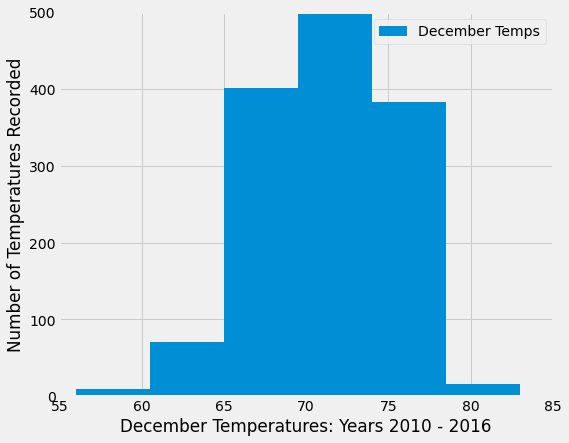

In [81]:
# December temps plotted
dec_df.plot.hist(bins=6, figsize=(8,6))
plt.tight_layout()
plt.xlim(55, 85)
plt.ylim(0, 500)
plt.ylabel('Number of Temperatures Recorded')
plt.xlabel('December Temperatures: Years 2010 - 2016')
plt.savefig('Resources/dec_hist.png')
plt.show()



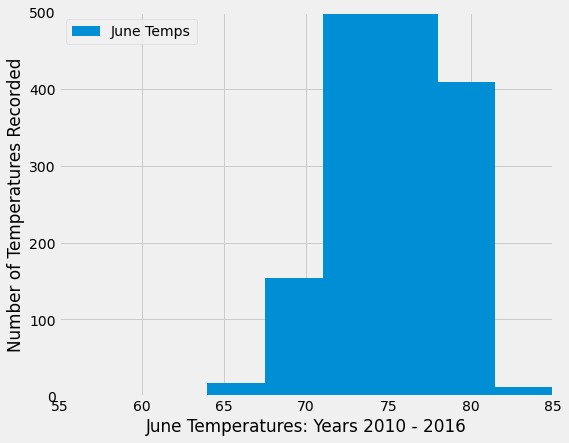

In [82]:
# June temps plotted
jun_df.plot.hist(bins=6, figsize=(8,6))
plt.tight_layout()
plt.xlim(55, 85)
plt.ylim(0, 500)
plt.ylabel('Number of Temperatures Recorded')
plt.xlabel('June Temperatures: Years 2010 - 2016')
plt.savefig('Resources/jun_hist.png')
plt.show()



### Additional Queries

In [233]:
# get percipitation  and temps from specific weather station: Jun
rain_06 = []
rain_06 = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
filter(extract('month', Measurement.date) == '06').\
filter(Measurement.station == 'USC00519281').all()

rain_06_df = pd.DataFrame(rain_06, columns=['date', 'temperature', 'precipitation'])
rain_06_df.set_index(rain_06_df['date'], inplace=True)

rain_06_df.head()

,date,temperature,precipitation
date,,,
2010-06-01,2010-06-01,71.0,0.00
2010-06-02,2010-06-02,71.0,0.03
2010-06-03,2010-06-03,72.0,0.00
2010-06-04,2010-06-04,72.0,0.00
2010-06-05,2010-06-05,76.0,0.00


In [234]:
# get percipitation  and temps from specific weather station: Dec
rain_12 = []
rain_12 = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
filter(extract('month', Measurement.date) == '12').\
filter(Measurement.station == 'USC00519281').all()

rain_12_df = pd.DataFrame(rain_12, columns=['date', 'temperature', 'precipitation'])
rain_12_df.set_index(rain_12_df['date'], inplace=True)

rain_12_df

,date,temperature,precipitation
date,,,
2010-12-01,2010-12-01,72.0,1.35
2010-12-02,2010-12-02,71.0,0.16
2010-12-03,2010-12-03,72.0,0.47
2010-12-04,2010-12-04,74.0,0.00
2010-12-05,2010-12-05,66.0,0.00
...,...,...,...
2016-12-27,2016-12-27,71.0,0.05
2016-12-28,2016-12-28,72.0,0.09
2016-12-29,2016-12-29,74.0,0.52


In [235]:
# create a boolean for good or bad weather conditions based on rain and temp
#rain_06_df[weather_good] = np.where(rain_06_df['precipitation'] == '0.00' or rain_06_df["tobs"] >= '73.0', True, False)
#rain_06_df.head()

def weather(c):
  if c['temperature'] >= 73.0 and c['precipitation'] <= 0.10:
    return 'perfect'
  elif c['temperature'] >= 73.0 and c['precipitation'] > 0.10:
    return 'warm rain'   
  elif c['temperature'] < 73.0 and c['precipitation'] <= 0.10:
    return 'cool dry'
  else:
    return 'poor'

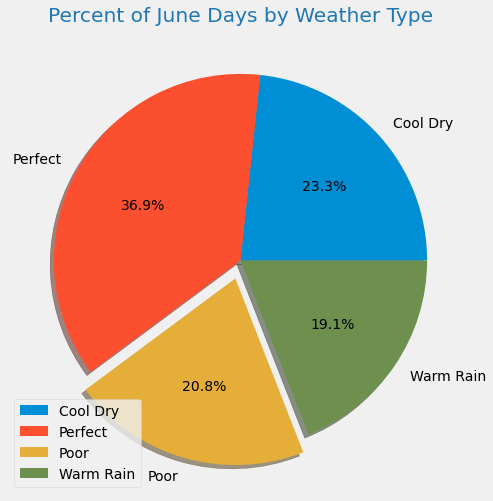

weather_type
cool dry     55
perfect      87
poor         49
warm rain    45
Name: date, dtype: int64


In [236]:
# Apply function to June data
rain_06_df['weather_type'] = rain_06_df.apply(weather, axis=1)
jun_wtype = rain_06_df.groupby('weather_type')['date'].count()

plt.style.use('fivethirtyeight')
plt.subplots(figsize=(8, 8))
plt.pie(jun_wtype,
            labels=["Cool Dry", "Perfect", "Poor", "Warm Rain"],
            explode=[0, 0.0, 0.1, 0],
            autopct='%1.1f%%',
            shadow=True, startangle=0)
plt.title('Percent of June Days by Weather Type', color = "Tab:blue")
plt.legend(loc = 'lower left')
plt.savefig('Resources/jun_wtype.png')
plt.show()

print(jun_wtype)

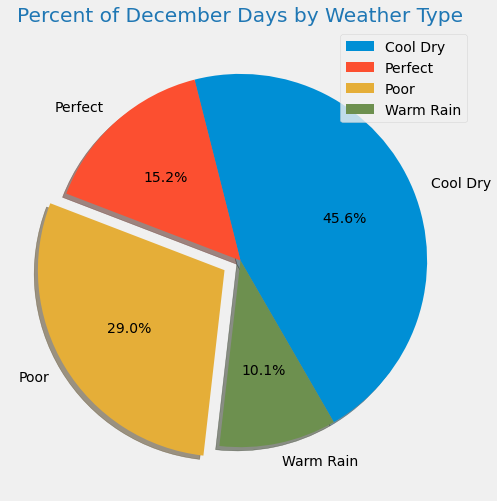

weather_type
cool dry     99
perfect      33
poor         63
warm rain    22
Name: date, dtype: int64


In [237]:
rain_12_df['weather_type'] = rain_12_df.apply(weather, axis=1)
dec_wtype = rain_12_df.groupby('weather_type')['date'].count()

plt.style.use('fivethirtyeight')
plt.subplots(figsize=(8, 8))
plt.pie(dec_wtype,
            labels=["Cool Dry", "Perfect", "Poor", "Warm Rain"],
            explode=[0, 0.0, 0.1, 0],
            autopct='%1.1f%%',
            shadow=True, startangle=300)
plt.title('Percent of December Days by Weather Type', color = "Tab:blue")
plt.legend()
plt.savefig('Resources/dec_wtype.png')
plt.show()

print(dec_wtype)

### Which month has the most perfect days?

In [356]:
# Pull the entire year precipitation and temperatures
all = []
all = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
filter(Measurement.station == 'USC00519281').all()

all_df = pd.DataFrame(all, columns=['date','tobs', 'prcp']).rename(columns={'tobs':'temperature', 'prcp':'precipitation'})

#all_df.drop('date', axis=1, inplace=True)
all_df

,date,temperature,precipitation
0,2010-01-01,70.0,0.15
1,2010-01-02,62.0,0.00
2,2010-01-03,74.0,0.00
3,2010-01-04,75.0,0.00
4,2010-01-05,74.0,0.00
...,...,...,...
2767,2017-08-14,77.0,0.00
2768,2017-08-15,77.0,0.32
2769,2017-08-16,76.0,0.12
2770,2017-08-17,76.0,0.01


In [352]:
# Creating a copy of DF with various date columns to be used in future summaries
daily_df = all_df.groupby('date').mean()
daily_df['date'] = daily_df.index
daily_df[['year', 'month', 'day']] = daily_df['date'].str.split('-', expand=True)
daily_df['month_day'] = daily_df['month'] + daily_df['day']
daily_df

,temperature,precipitation,date,year,month,day,month_day
date,,,,,,,
2010-01-01,70.0,0.15,2010-01-01,2010,01,01,0101
2010-01-02,62.0,0.00,2010-01-02,2010,01,02,0102
2010-01-03,74.0,0.00,2010-01-03,2010,01,03,0103
2010-01-04,75.0,0.00,2010-01-04,2010,01,04,0104
2010-01-05,74.0,0.00,2010-01-05,2010,01,05,0105
...,...,...,...,...,...,...,...
2017-08-14,77.0,0.00,2017-08-14,2017,08,14,0814
2017-08-15,77.0,0.32,2017-08-15,2017,08,15,0815
2017-08-16,76.0,0.12,2017-08-16,2017,08,16,0816


In [371]:
# Call weather function to add weather_type variable
daily_df['weather_type'] = daily_df.apply(weather, axis=1)

# Summarize daily data by month and weather type and output a df
# to see by month the "best" and "worst" months for business
daily2_df = pd.DataFrame(daily_df.groupby(['month', 'weather_type'])['date'].count()).reset_index()

daily2_df

,month,weather_type,date
0,01,cool dry,155
1,01,perfect,34
2,01,poor,52
3,01,warm rain,7
4,02,cool dry,153
5,02,perfect,16
6,02,poor,48
7,02,warm rain,9
8,03,cool dry,133
9,03,perfect,31


In [375]:
pvt_df = daily2_df.pivot(index='weather_type', columns='month', values='date')
pvt_df = pvt_df.rename(columns={'01': 'Jan', 
                                '02': 'Feb',
                                '03': 'Mar',
                                '04': 'Apr',
                                '05': 'May',
                                '06': 'Jun',
                                '07': 'Jul',
                                '08': 'Aug',
                                '09': 'Sep',
                                '10': 'Oct',
                                '11': 'Nov',
                                '12': 'Dec'})
pvt_df

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
weather_type,,,,,,,,,,,,
cool dry,155,153,133,91,76,55,40,23,36,56,70,99
perfect,34,16,31,58,76,87,101,120,85,77,56,33
poor,52,48,76,72,61,49,24,18,15,39,43,63
warm rain,7,9,8,19,35,45,83,65,74,44,40,22


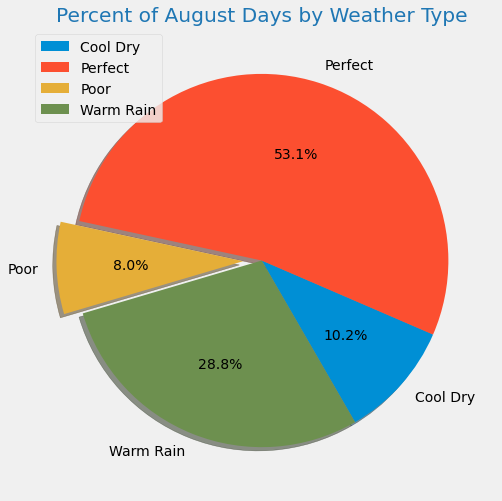

weather_type
cool dry      23
perfect      120
poor          18
warm rain     65
Name: date, dtype: int64


In [359]:
# Based on above results, looks like August has the best weather 
aug_wtype = daily_df.loc[daily_df['month'] == '08'].groupby('weather_type')['date'].count()
aug_wtype                         

plt.style.use('fivethirtyeight')
plt.subplots(figsize=(8, 8))
plt.pie(aug_wtype,
            labels=["Cool Dry", "Perfect", "Poor", "Warm Rain"],
            explode=[0, 0.0, 0.1, 0],
            autopct='%1.1f%%',
            shadow=True, startangle=300)
plt.title('Percent of August Days by Weather Type', color = "Tab:blue")
plt.legend(loc = 'upper left')
plt.savefig('Resources/aug_wtype.png')
plt.show()

print(aug_wtype)

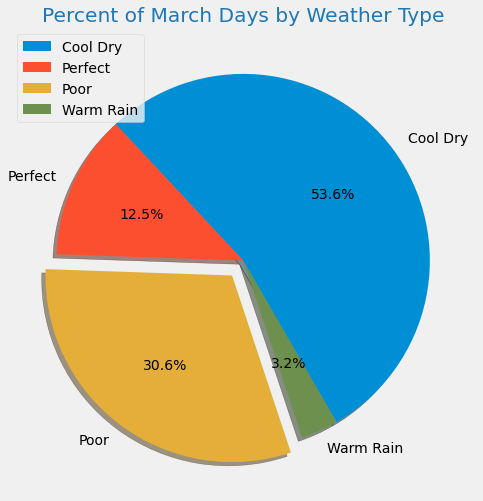

weather_type
cool dry     55
perfect      87
poor         49
warm rain    45
Name: date, dtype: int64


In [360]:
# Based on above results, looks like March has the best weather 
mar_wtype = daily_df.loc[daily_df['month'] == '03'].groupby('weather_type')['date'].count()
mar_wtype                         

plt.style.use('fivethirtyeight')
plt.subplots(figsize=(8, 8))
plt.pie(mar_wtype,
            labels=["Cool Dry", "Perfect", "Poor", "Warm Rain"],
            explode=[0, 0.0, 0.1, 0],
            autopct='%1.1f%%',
            shadow=True, startangle=300)
plt.title('Percent of March Days by Weather Type', color = "Tab:blue")
plt.legend(loc = 'upper left')
plt.savefig('Resources/mar_wtype.png')
plt.show()

print(jun_wtype)

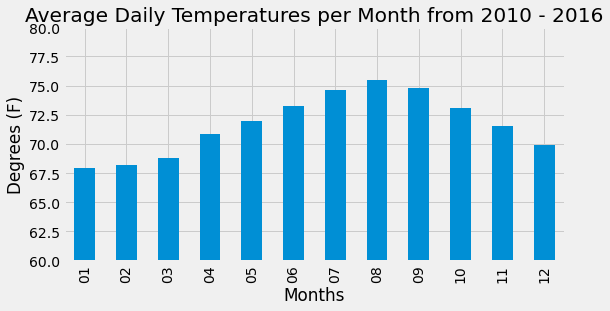

month
01    67.923387
02    68.163717
03    68.826613
04    70.887500
05    72.000000
06    73.271186
07    74.620968
08    75.446903
09    74.823810
10    73.041667
11    71.559809
12    69.903226
Name: temperature, dtype: float64


In [363]:
month_ave = daily_df.groupby('month')[('temperature')].mean()
month_ave.plot.bar(figsize=(8, 4))
plt.title("Average Daily Temperatures per Month from 2010 - 2016")
plt.ylabel('Degrees (F)')
plt.xlabel('Months')
plt.ylim(60, 80)
plt.savefig('Resources/ave_daily_temp.png')
plt.show()
print(month_ave)

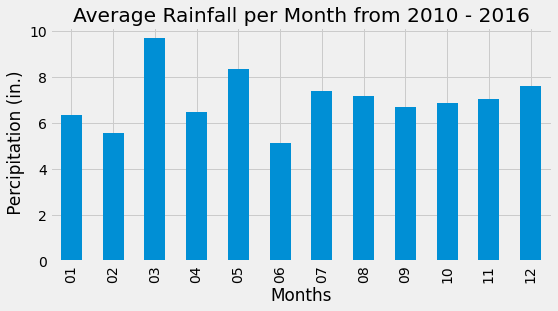

month
01    6.344286
02    5.562857
03    9.658571
04    6.464286
05    8.308571
06    5.108571
07    7.355714
08    7.164286
09    6.681429
10    6.847143
11    7.002857
12    7.592857
Name: precipitation, dtype: float64


In [365]:
# Average rainfall per month - sum and divide by  (number of years of data)
#month = ["Jan", "Feb", "Mar", "April", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]
month_ave2 = (daily_df.groupby('month')[('precipitation')].sum()/7)
month_ave2.plot.bar(figsize=(8, 4))
plt.title("Average Rainfall per Month from 2010 - 2016")
plt.ylabel(' Percipitation (in.)')
plt.xlabel('Months')
plt.savefig('Resources/ave_month_rain.png')
plt.show()
print(month_ave2)

### Code written but not used...for future reference only

In [ ]:
Average temp and percipitation per day of month (7 year average for each 365 days)  
Decided not to use because conditions lost their qualitative distinction  
but they work!

In [ ]:
# Average daily temp and percipitation for each day from 2010-2016
day_sum_df = daily_df.groupby('month_day').mean()
day_sum_df.head(100)

# Pull in 'weather_type' to each day
day_sum_df['weather_type'] = day_sum_df.apply(weather, axis=1)
day_sum_df['month'] = day_sum_df.index.str[:2]
#day_sum_df["date"] = day_sum_df.index

month_sum_df = day_sum_df.groupby(['month','weather_type']).count()
month_sum_df

y_axis1 = pvt_df.iloc[0].tolist()